In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import runpy

In [2]:
# Path to your Excel file
SOURCE_DATA_SF3 = 'SupplementaryFigure3.xlsx'

# Read specific sheet and ranges
mf = pd.read_excel(SOURCE_DATA_SF3, sheet_name='Figure S3b,c,d,f', usecols='A:HY', skiprows=2, nrows=502)
pc = pd.read_excel(SOURCE_DATA_SF3, sheet_name='Figure S3b,c,d,f', usecols='HZ:TP', skiprows=2, nrows=502)

In [3]:
# rate is ssc0, drate is wv0
lm_MF = {
    'rate': mf.iloc[:, 0:116].to_numpy().T,
    'drate': mf.iloc[:, 116:232].to_numpy().T,
    'v0': mf.iloc[0, 232],
    'label': 'MF'
}

lm_PC = {
    'rate': pc.iloc[:, 0:151].to_numpy().T,
    'drate': pc.iloc[:, 151:302].to_numpy().T,
    'v0': pc.iloc[0, 302],
    'label': 'PC'
}

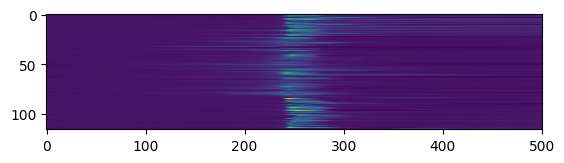

In [4]:
plt.imshow(lm_MF["rate"])

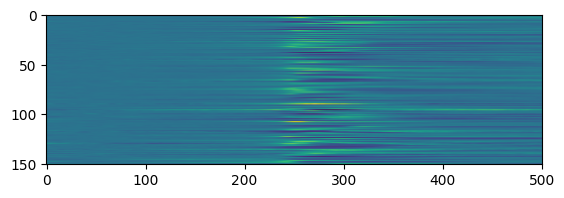

In [5]:
plt.imshow(lm_PC["rate"])

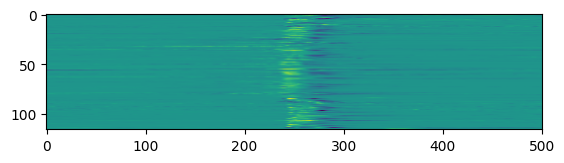

In [6]:
plt.imshow(lm_MF["drate"])

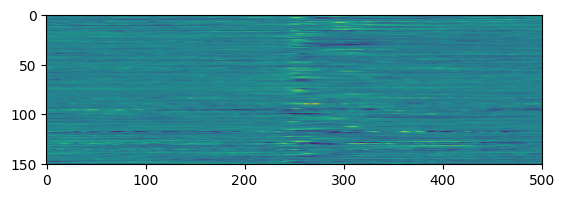

In [7]:
plt.imshow(lm_PC["drate"])

In [8]:
# PCA analysis for mossy fibers

from sklearn.decomposition import PCA

# Loop over the orientations (assuming 8 orientations)
temp_data =lm_MF["rate"].T  # Transpose to match the MATLAB orientation
pca = PCA()
pca.fit(temp_data)  # Perform PCA
v = pca.components_   # coeff
p = pca.transform(temp_data).T  # scores
dd = pca.explained_variance_ratio_   # explained variance

# Get the explained variance ratio and cumulative sum
var_explained = np.cumsum(dd) * 100

# Print the variance explained for the first 5 components
for i in range(5):
    print(f'Dimensions: {i+1}, Variance explained: {var_explained[i]:.2f}%')

# Find the dimension to reduce to based on cumulative variance explained
nmode = np.argmax(var_explained > 87.5) + 1  # Adding 1 since indexing is 1-based in MATLAB
print(f'Dimensions to be reduced: {nmode}')

# Store PCA results for each orientation
PCA_total_MP = {'v': pca.components_, 'p': pca.transform(temp_data), 'dd': pca.explained_variance_ratio_}

Dimensions: 1, Variance explained: 75.03%
Dimensions: 2, Variance explained: 87.63%
Dimensions: 3, Variance explained: 93.15%
Dimensions: 4, Variance explained: 95.70%
Dimensions: 5, Variance explained: 97.19%
Dimensions to be reduced: 2


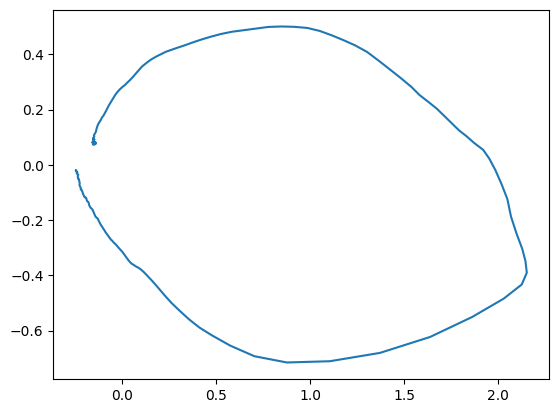

In [9]:
plt.plot(PCA_total_MP['p'].T[0],PCA_total_MP['p'].T[1])

In [10]:
# PCA analysis for perkinje cells

from sklearn.decomposition import PCA

# Loop over the orientations (assuming 8 orientations)
temp_data =lm_PC["rate"].T  # Transpose to match the MATLAB orientation
pca = PCA()
pca.fit(temp_data)  # Perform PCA
v = pca.components_   # coeff
p = pca.transform(temp_data).T  # scores
dd = pca.explained_variance_ratio_   # explained variance

# Get the explained variance ratio and cumulative sum
var_explained = np.cumsum(dd) * 100

# Print the variance explained for the first 5 components
for i in range(5):
    print(f'Dimensions: {i+1}, Variance explained: {var_explained[i]:.2f}%')

# Find the dimension to reduce to based on cumulative variance explained
nmode = np.argmax(var_explained > 87.5) + 1  # Adding 1 since indexing is 1-based in MATLAB
print(f'Dimensions to be reduced: {nmode}')

# Store PCA results for each orientation
PCA_total_PC = {'v': pca.components_, 'p': pca.transform(temp_data), 'dd': pca.explained_variance_ratio_}

Dimensions: 1, Variance explained: 51.04%
Dimensions: 2, Variance explained: 76.08%
Dimensions: 3, Variance explained: 85.97%
Dimensions: 4, Variance explained: 92.26%
Dimensions: 5, Variance explained: 94.65%
Dimensions to be reduced: 4


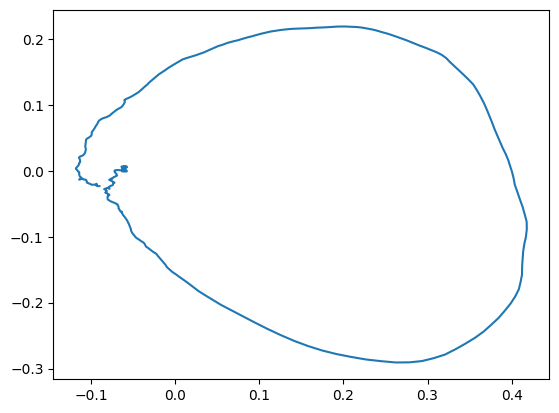

In [11]:
plt.plot(PCA_total_PC['p'].T[0],PCA_total_PC['p'].T[1])

In [12]:
#For FN PCA
result = runpy.run_path('datasorting_orientation.py')

val_cat = result['val_cat']
data_cat = result['data_cat']
del result

# preprocessing
data_total = []
for a in range(8): # orientation
    temp = np.array(data_cat).T[a]
    t_temp = []
    for data_num in range(np.shape(data_cat)[0]):
        temp2 = np.mean(temp[0],axis=0)
        t_temp.append(temp2)
        
    data_total.append(t_temp)

# smothing
from filter_matrix import filter_matrix

data_cat_sm = []
for angle in range(8):
    temp_cat = [];
    for n in range(np.shape(data_cat)[0]):
        z = data_cat[n][angle]
        zf = filter_matrix(z,2)
        temp_cat.append(np.mean(zf,axis=0))
        
    data_cat_sm.append(temp_cat)

data_cat_sm = np.array(data_cat_sm)

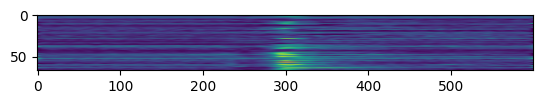

In [13]:
plt.imshow(data_cat_sm[0])

In [14]:
# PCA analysis

from sklearn.decomposition import PCA

PCA_total = {}

# Loop over the orientations (assuming 8 orientations)
for ori in range(8):
    temp_data = data_cat_sm[ori].T  # Transpose to match the MATLAB orientation
    pca = PCA()
    pca.fit(temp_data)  # Perform PCA
    v = pca.components_   # coeff
    p = pca.transform(temp_data).T  # scores
    dd = pca.explained_variance_ratio_   # explained variance

    # Get the explained variance ratio and cumulative sum
    var_explained = np.cumsum(dd) * 100
    
    # Print the variance explained for the first 5 components
    for i in range(5):
        print(f'Dimensions: {i+1}, Variance explained: {var_explained[i]:.2f}%')

    # Find the dimension to reduce to based on cumulative variance explained
    nmode = np.argmax(var_explained > 87.5) + 1  # Adding 1 since indexing is 1-based in MATLAB
    print(f'Dimensions to be reduced: {nmode}')
    
    # Store PCA results for each orientation
    PCA_total[ori] = {'v': pca.components_, 'p': pca.transform(temp_data), 'dd': pca.explained_variance_ratio_}

del ori

Dimensions: 1, Variance explained: 65.68%
Dimensions: 2, Variance explained: 75.64%
Dimensions: 3, Variance explained: 80.99%
Dimensions: 4, Variance explained: 85.31%
Dimensions: 5, Variance explained: 88.71%
Dimensions to be reduced: 5
Dimensions: 1, Variance explained: 64.05%
Dimensions: 2, Variance explained: 78.73%
Dimensions: 3, Variance explained: 83.99%
Dimensions: 4, Variance explained: 87.57%
Dimensions: 5, Variance explained: 90.69%
Dimensions to be reduced: 4
Dimensions: 1, Variance explained: 57.01%
Dimensions: 2, Variance explained: 76.14%
Dimensions: 3, Variance explained: 82.16%
Dimensions: 4, Variance explained: 86.65%
Dimensions: 5, Variance explained: 89.17%
Dimensions to be reduced: 5
Dimensions: 1, Variance explained: 58.25%
Dimensions: 2, Variance explained: 76.74%
Dimensions: 3, Variance explained: 82.72%
Dimensions: 4, Variance explained: 87.21%
Dimensions: 5, Variance explained: 89.41%
Dimensions to be reduced: 5
Dimensions: 1, Variance explained: 62.37%
Dimens

In [16]:
pca_data = []
for pc in range(4):
    for a in range(8):
        temp = PCA_total[a]['p'].T
        temp = temp[pc]
        pca_data.append(temp)
pca_data = np.array(pca_data)

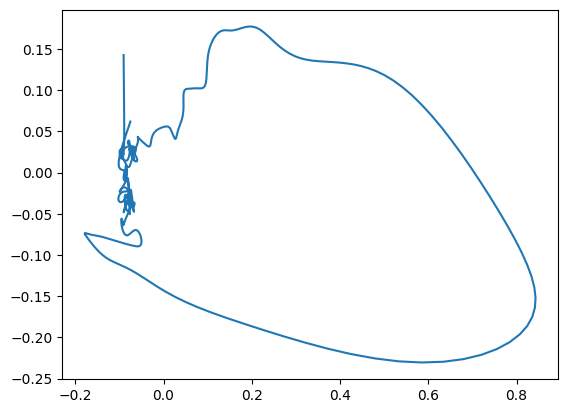

In [17]:
plt.plot(pca_data[0],pca_data[8])

In [18]:
pFN = pca_data[:,50:550]

pMP = PCA_total_MP['p']
pMP = pMP[:500, :5]

pPC = PCA_total_PC['p']
pPC = pPC[:500, :5]

pMPC = np.hstack((pMP, pPC))

In [19]:
pFN = pca_data[:,50:550]

pMP = PCA_total_MP['p']
pMP = pMP[:500, :2]

pPC = PCA_total_PC['p']
pPC = pPC[:500, :4]

pMPC = np.hstack((pMP, pPC))

In [20]:
betas = []
r_2 = []
for a in range(len(pFN)):
    beta, resid = np.linalg.lstsq(pMPC, pFN[a], rcond=None)[:2]
    resid = np.linalg.norm(pMPC @ beta - pFN[a])**2
    r_s = 1 - resid / (pFN[a].size * pFN[a].var())
    betas.append(beta)
    r_2.append(r_s)

betas = np.array(betas)
r_2 = np.array(r_2)

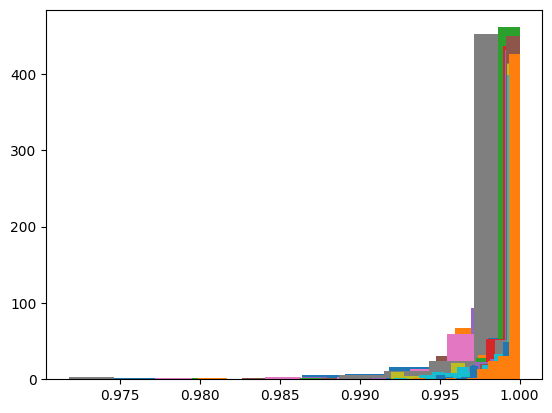

In [31]:
# hist for r^2 (timepoint is sample)

for a in range(len(pFN)):
    plt.hist(1-(pMPC @ betas[a] - pFN[a])**2)

In [22]:
df(betas[:16])

,0,1,2,3,4,5
0,0.446815,-0.475276,0.371034,1.029513,0.154328,-0.858864
1,0.398816,-0.487578,0.512260,0.720660,0.424688,-0.572048
2,0.352483,-0.350611,0.438208,0.608242,0.690383,-0.501252
3,0.383778,-0.340101,0.422804,0.881047,0.315349,-0.736331
4,0.478485,-0.139017,0.174377,1.352613,-0.441856,-0.889017
5,0.397199,0.020467,0.381682,1.143729,-0.272916,-0.920517
6,0.444467,-0.261105,0.361076,1.186867,-0.045838,-1.162982
7,0.449729,-0.226730,0.317058,1.033881,0.012616,-0.827470
8,-0.065513,0.267353,0.212397,0.134588,0.187269,0.048013
9,-0.151929,0.136976,0.545833,0.257726,0.860796,-0.100049


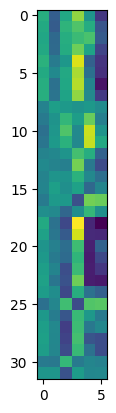

In [23]:
plt.imshow(betas)
# plt.savefig("beta.jpg")

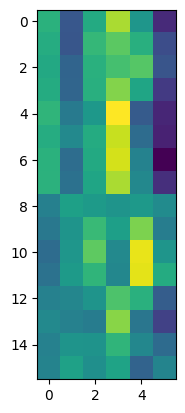

In [24]:
plt.imshow(betas[:16])

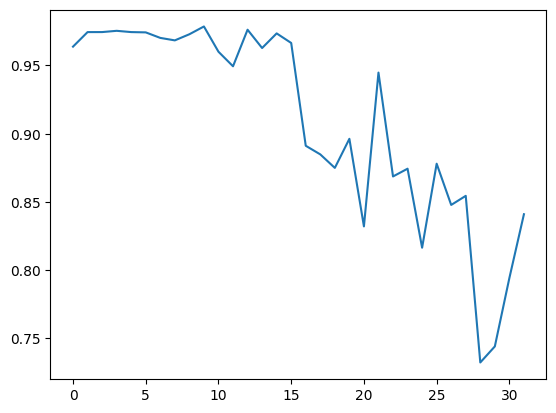

In [25]:
plt.plot(r_2)

# plt.savefig("r2.jpg")

In [26]:
pFN.shape

(32, 500)

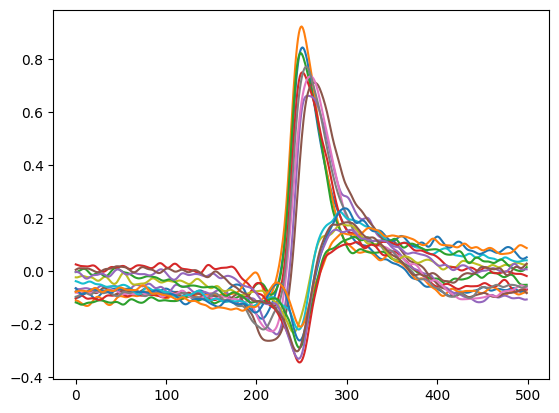

In [27]:
for a in range(16):
    plt.plot(pFN[a])